In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC 
import pandas as pd


In [2]:
iris=load_iris()

In [3]:
df1=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df1['target']=iris.target

In [4]:
df1.columns
df= df1.drop(['sepal length (cm)', 'sepal width (cm)'],axis=1)

In [5]:
df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [6]:
x=df.drop(['target'],axis=1)

In [7]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [8]:
y=(iris['target']==2).astype(np.float64)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
svm_clf=Pipeline([('scaler',StandardScaler()),
                 ("linear_svc",LinearSVC(C=10,loss="hinge"))])

svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge'))])

In [10]:
print(svm_clf.predict([[5.7,1.7]]))
print(svm_clf.predict([[2.7,1.2]]))
print(svm_clf.predict([[5.7,5.2]]))

[1.]
[0.]
[1.]


C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

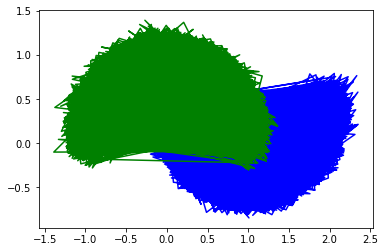

In [12]:
import matplotlib.pyplot as plt
x,y= make_moons(n_samples=100000,noise=0.10)
plt.plot(x[:,0][y==1],x[: ,1][y==1],'b')
plt.plot(x[:,0][y==0],x[:, 1][y==0],'g')

In [13]:
y==1

array([ True,  True, False, ...,  True, False, False])

In [14]:
polynomial_svm_clf=Pipeline([("polynomial_features",PolynomialFeatures(degree=3)),('scaler',StandardScaler()),
                 ("linear_svc",LinearSVC(C=10,loss="hinge"))])

polynomial_svm_clf.fit(x,y)

C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge'))])

In [15]:
print(polynomial_svm_clf.predict([[0.5,-0.9]]))
print(polynomial_svm_clf.predict([[1.5,-1.9]]))
print(polynomial_svm_clf.predict([[2.5,2.9]]))
print(polynomial_svm_clf.predict([[2.5,-1.9]]))

[1]
[1]
[0]
[1]


In [16]:
from sklearn.svm import SVC
polynomial_kernel_svm_clf=Pipeline([('scaler',StandardScaler()),
                 ("linear_svc",SVC(kernel='poly',degree=3,C=10))])
                                   
polynomial_kernel_svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', SVC(C=10, kernel='poly'))])

In [17]:
print(polynomial_kernel_svm_clf.predict([[0.5,-0.9]]))
print(polynomial_kernel_svm_clf.predict([[1.5,-1.9]]))
print(polynomial_kernel_svm_clf.predict([[2.5,2.9]]))
print(polynomial_kernel_svm_clf.predict([[2.5,-1.9]]))

[1]
[1]
[0]
[1]
